# Lesson B: Data Cleaning in pandas (Step by Step)

In [8]:
import pandas as pd
import numpy as np
# Sample Dataset
data = {
    "name" : ['Kavee','Seriman','Anu'],
    "Age" : [25,np.nan,"40"],
    "Salary":[50000,125000,None],
    "Department":["HR","IT","hr"]
}

df=pd.DataFrame(data)
df

,name,Age,Salary,Department
0,Kavee,25,50000.0,HR
1,Seriman,NaN,125000.0,IT
2,Anu,40,NaN,hr


In [9]:
# Identify Missing Values
df.isnull().sum()

name          0
Age           1
Salary        1
Department    0
dtype: int64

In [10]:
# Numerical column → use mean/median
df['Age']= pd.to_numeric(df['Age'],errors="coerce")
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Kaveeshvar\AppData\Local\Temp\ipykernel_31072\1791455713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
df

,name,Age,Salary,Department
0,Kavee,25.0,50000.0,HR
1,Seriman,32.5,125000.0,IT
2,Anu,40.0,NaN,hr


In [11]:
# Categorical column → use mode
df['Department'].fillna(df['Department'].mode()[0],inplace=True)
df

,name,Age,Salary,Department
0,Kavee,25.0,50000.0,HR
1,Seriman,32.5,125000.0,IT
2,Anu,40.0,NaN,hr


In [12]:
df.isnull().sum()

name          0
Age           0
Salary        1
Department    0
dtype: int64

In [13]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)
df

C:\Users\Kaveeshvar\AppData\Local\Temp\ipykernel_31072\3226969056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(),inplace=True)


,name,Age,Salary,Department
0,Kavee,25.0,50000.0,HR
1,Seriman,32.5,125000.0,IT
2,Anu,40.0,87500.0,hr


In [16]:
# Detect duplicates
df.duplicated().sum()

np.int64(0)

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [22]:
# Cleaning Categorical Data (Standardization)
df['Department'].unique()

array(['hr', 'it'], dtype=object)

In [20]:
df['Department']=df['Department'].str.strip().str.lower()

In [21]:
df

,name,Age,Salary,Department
0,Kavee,25.0,50000.0,hr
1,Seriman,32.5,125000.0,it
2,Anu,40.0,87500.0,hr


In [23]:
df['Salary'].describe()

count         3.0
mean      87500.0
std       37500.0
min       50000.0
25%       68750.0
50%       87500.0
75%      106250.0
max      125000.0
Name: Salary, dtype: float64

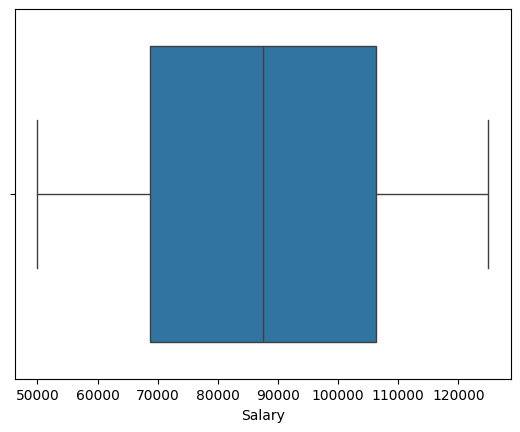

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Salary"])
plt.show()


In [35]:

data = {
    "name" : ['Kavee','Seriman','Anu','a','b'],
    "Age" : [25,27,"40",10,20],
    "Salary":[50000,9999999,55000,60000,65000],
    "Department":["HR","IT","hr",'hr','hr']
}

df=pd.DataFrame(data)
df

,name,Age,Salary,Department
0,Kavee,25,50000,HR
1,Seriman,27,9999999,IT
2,Anu,40,55000,hr
3,a,10,60000,hr
4,b,20,65000,hr


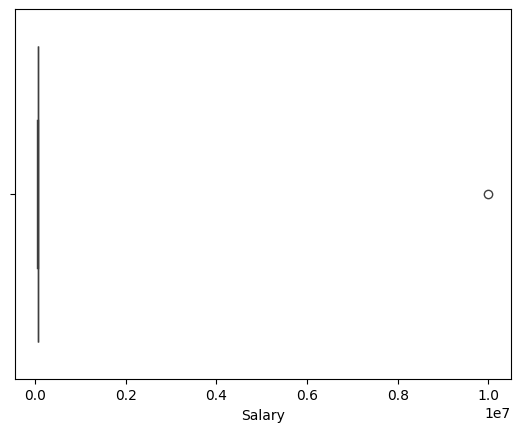

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Salary"])
plt.show()


In [37]:
# Detecting Outliers – IQR Method (Most Used)
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 +1.5*IQR

lower_bound,upper_bound

(np.float64(40000.0), np.float64(80000.0))

In [38]:
outliers = df[(df['Salary']<lower_bound) | (df['Salary']>upper_bound)]
outliers

,name,Age,Salary,Department
1,Seriman,27,9999999,IT


In [39]:
# Treating Outliers - Capping (Winsorization)
df["Salary_capped"] = df["Salary"].clip(lower=lower_bound,upper=upper_bound)
df

,name,Age,Salary,Department,Salary_capped
0,Kavee,25,50000,HR,50000
1,Seriman,27,9999999,IT,80000
2,Anu,40,55000,hr,55000
3,a,10,60000,hr,60000
4,b,20,65000,hr,65000


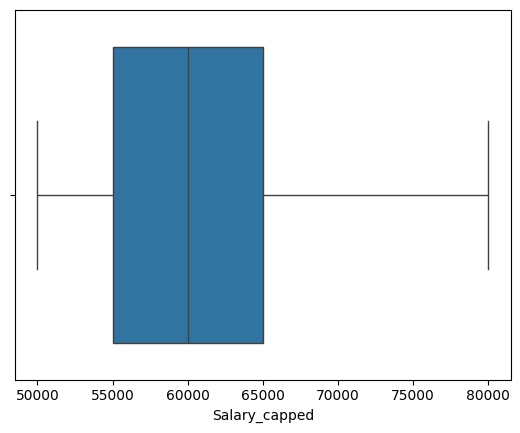

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Salary_capped"])
plt.show()
